In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'High', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind' : ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play' : ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df =  pd.DataFrame(data)

In [27]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [28]:
df.tail

<bound method NDFrame.tail of      Outlook Temperature Humidity    Wind Play
0      Sunny         Hot     High    Weak   No
1      Sunny         Hot     High  Strong   No
2   Overcast         Hot     High    Weak  Yes
3       Rain        Mild     High    Weak  Yes
4       Rain        Cool   Normal    Weak  Yes
5       Rain        Cool   Normal  Strong   No
6   Overcast        Cool   Normal  Strong  Yes
7      Sunny        Mild     High    Weak   No
8      Sunny        Cool   Normal    Weak  Yes
9       Rain        Mild   Normal    Weak  Yes
10     Sunny        Mild   Normal  Strong  Yes
11  Overcast        Mild     High  Strong  Yes
12  Overcast        High   Normal    Weak  Yes
13      Rain        Mild     High  Strong   No>

In [29]:
df.info

<bound method DataFrame.info of      Outlook Temperature Humidity    Wind Play
0      Sunny         Hot     High    Weak   No
1      Sunny         Hot     High  Strong   No
2   Overcast         Hot     High    Weak  Yes
3       Rain        Mild     High    Weak  Yes
4       Rain        Cool   Normal    Weak  Yes
5       Rain        Cool   Normal  Strong   No
6   Overcast        Cool   Normal  Strong  Yes
7      Sunny        Mild     High    Weak   No
8      Sunny        Cool   Normal    Weak  Yes
9       Rain        Mild   Normal    Weak  Yes
10     Sunny        Mild   Normal  Strong  Yes
11  Overcast        Mild     High  Strong  Yes
12  Overcast        High   Normal    Weak  Yes
13      Rain        Mild     High  Strong   No>

In [30]:
df.describe

<bound method NDFrame.describe of      Outlook Temperature Humidity    Wind Play
0      Sunny         Hot     High    Weak   No
1      Sunny         Hot     High  Strong   No
2   Overcast         Hot     High    Weak  Yes
3       Rain        Mild     High    Weak  Yes
4       Rain        Cool   Normal    Weak  Yes
5       Rain        Cool   Normal  Strong   No
6   Overcast        Cool   Normal  Strong  Yes
7      Sunny        Mild     High    Weak   No
8      Sunny        Cool   Normal    Weak  Yes
9       Rain        Mild   Normal    Weak  Yes
10     Sunny        Mild   Normal  Strong  Yes
11  Overcast        Mild     High  Strong  Yes
12  Overcast        High   Normal    Weak  Yes
13      Rain        Mild     High  Strong   No>

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
df_encoded = pd.get_dummies(df)
X = pd.get_dummies(df.drop(columns = ['Play']))
y = df['Play']

In [32]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,random_state = 42)

In [33]:
model = DecisionTreeClassifier()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [34]:
print(accuracy_score(y_test , y_pred))

0.6666666666666666


In [35]:
print(confusion_matrix(y_test , y_pred))

[[0 1]
 [0 2]]


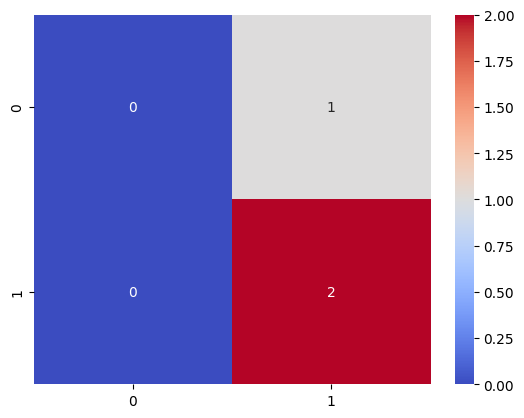

In [36]:
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot = True , cmap = 'coolwarm')
plt.show()

In [37]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00         1
         Yes       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



c:\Users\Shlok Sonkusare\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shlok Sonkusare\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shlok Sonkusare\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

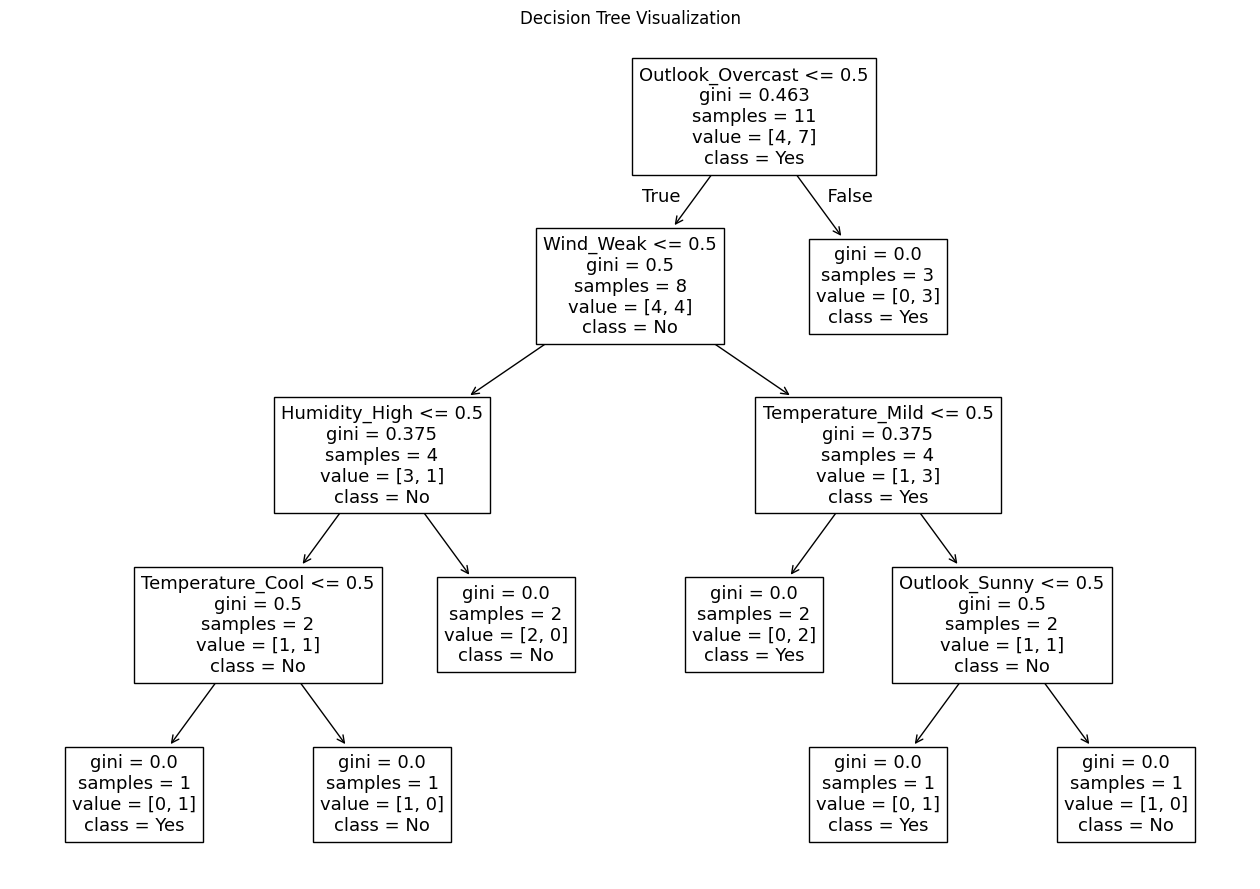

In [38]:
from sklearn.tree import plot_tree
# Plot the trained decision tree
plt.figure(figsize=(16, 11))  # Adjust the figure size for better readability
plot_tree(model, 
          feature_names=X_train.columns.tolist(),  # Feature names for the nodes
          class_names=["No", "Yes"],               # Target class names
         )                              # Font size for labels
plt.title("Decision Tree Visualization")
plt.show()

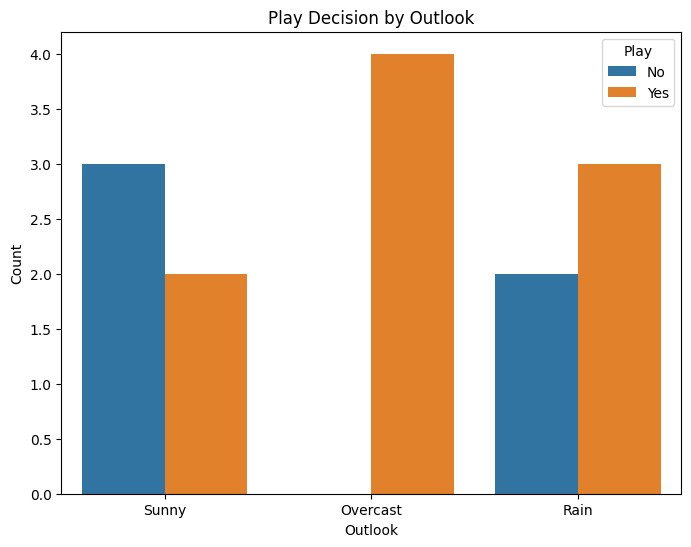

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Outlook', hue='Play', data=df)
plt.title('Play Decision by Outlook')
plt.xlabel('Outlook')
plt.ylabel('Count')
plt.show()